#**Kelompok 6 Bananaconda**

**Anggota :**
1. Fauziah Latifah
2. Vicky Jodie
3. Muhammad Hafidz Erdityo
4. Dimas Darmawan
5. Triarni Yuni Putri Utami
6. Nisa Awanis

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
!pip install category_encoders
import category_encoders as ce

In [2]:
#load data set
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## **Descriptive Statistics**

In [3]:
#informasi secara umum tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Pengamatan :
1. Data terdiri dari 5630 baris.
2. Kolom CouponUsed, OrderCount, dan DaySinceLastOrder perlu diganti tipe datanya menjadi integer karena tidak memerlukan bilangan desimal.
3. Terdapat beberapa kolom masih memiliki null/missing value (Non-Null Count < jumlah baris) seperti kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder.



In [4]:
#mencari kolom yang missing value
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Pengamatan :

Terdapat beberapa kolom masih memiliki null/missing value (Non-Null Count < jumlah baris) seperti kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder.

In [5]:
#cuplikan data
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2496,52497,0,1.0,Phone,1,33.0,Credit Card,Female,2.0,5,Laptop & Accessory,5,Married,1,0,21.0,1.0,1.0,0.0,148.77
2054,52055,1,0.0,Computer,1,NaN,CC,Male,2.0,4,Mobile,5,Single,1,1,22.0,0.0,1.0,2.0,123.21
3433,53434,0,31.0,Mobile Phone,1,9.0,Debit Card,Female,4.0,5,Grocery,2,Single,5,1,14.0,NaN,5.0,4.0,262.26
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
3398,53399,0,10.0,Computer,3,15.0,COD,Male,3.0,4,Laptop & Accessory,2,Married,6,0,14.0,2.0,2.0,8.0,175.79


Pengamatan :
1. Perlu penyesuaian nama value pada kolom PreferredLoginDevice (Mobile phone dan phone), PreferredPaymentMode (Credit Card dan CC, COD dan Cash on Delivery), dan PreferedOrderCat (Mobile Phone dan Mobile).

In [6]:
#deskripsi statistik
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Berdasarkan deskripsi statistik di atas, beberapa kolom memiliki nilai mean yang lebih besar dari median yang berarti distribusinya tidak mendekati normal. Kolom-kolom tersebut adalah Tenure, CityTier, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder dan CashbackAmount.

Pengamatan :

Sepertinya tidak ada anomali pada setiap entri kolom sudah sesuai.

## **Statistical Summary**

In [7]:
#pengelompokan kolom berdasarkan jenisnya
cats = []
nums = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cats.append(col)
    else:
        nums.append(col)

In [8]:
#informasi dari kolom numerik
nums

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [9]:
#ringkasan statistik dari kolom numerik
df[nums].describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Pengamatan  : 
1. Kolom CustomerID, Churn, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, dan Complain sudah cukup simetrik distribusinya karena nilai mean dan median tidak berbeda jauh satu sama lain.
2. Kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, dan CashbackAmount memiliki distribusi skew ke kanan (positively skewed) yang berarti mean > median.
3. Kolom Churn dan Complain ternyata bernilai boolean.



In [10]:
#informasi dari kolom kategorik
cats

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [11]:
#ringkasan statistik dari kolom kategorik
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Pengamatan :
1. Kolom PreferredPaymentMode, data didominasi oleh Debit Card sebanyak 2314 (41%).
2. Lebih dari 50% data merupakan milik customer Laki-laki dan berstatus menikah.
3. Kolom PreferredLoginDevice, data didominasi oleh Mobile Phone.
4. Laptop & Accessory menjadi data terbanyak pada kolom PreferedOrderCat (namun jika Mobile dan Mobile Phone penamaan valuenya diperbaiki, maka data terbanyak ada pada Mobile Phone).

## **Value Counting**

In [12]:
#memastikan kolom kategori dengan value counting
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



Data yang nama valuenya tidak serupa ditemukan pada kolom :
1. PreferredLoginDevice : Mobile Phone & Phone</br> 
2. PreferredPaymentMode : Credit Card & CC, Cash on Delivery & COD </br> 
3. PreferedOrderCat : Mobile Phone & Mobile </br>

#### **Proses Penyesuaian Nama Value**

In [13]:
def ganti_value(x):
  if x == 'Credit Card':
    return 'CC'
  elif x == 'Cash on Delivery':
    return 'COD'
  elif x == 'Phone':
    return 'Mobile Phone'
  return x

def ganti_value2(x):
  if x == 'Mobile':
    return 'Mobile Phone'
  return x



df['PreferedOrderCat'] = df['PreferedOrderCat'].apply(ganti_value2)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].apply(ganti_value)
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].apply(ganti_value)

Dalam hal ini penyesuaian nama value sudah dirapikan :

    - Kolom PreferredLoginDevice (Mobil Phone dan Phone) menjadi Mobile Phone
    - Kolom PreferredPaymentMode (Credit Card dan CC, COD dan Cash on Delivery) menjadi CC, COD
    - Kolom PreferedOrderCat (Mobile Phone dan Mobile) menjadi Mobile Phone

## **Univariate Analysis**

### Distribution Plot

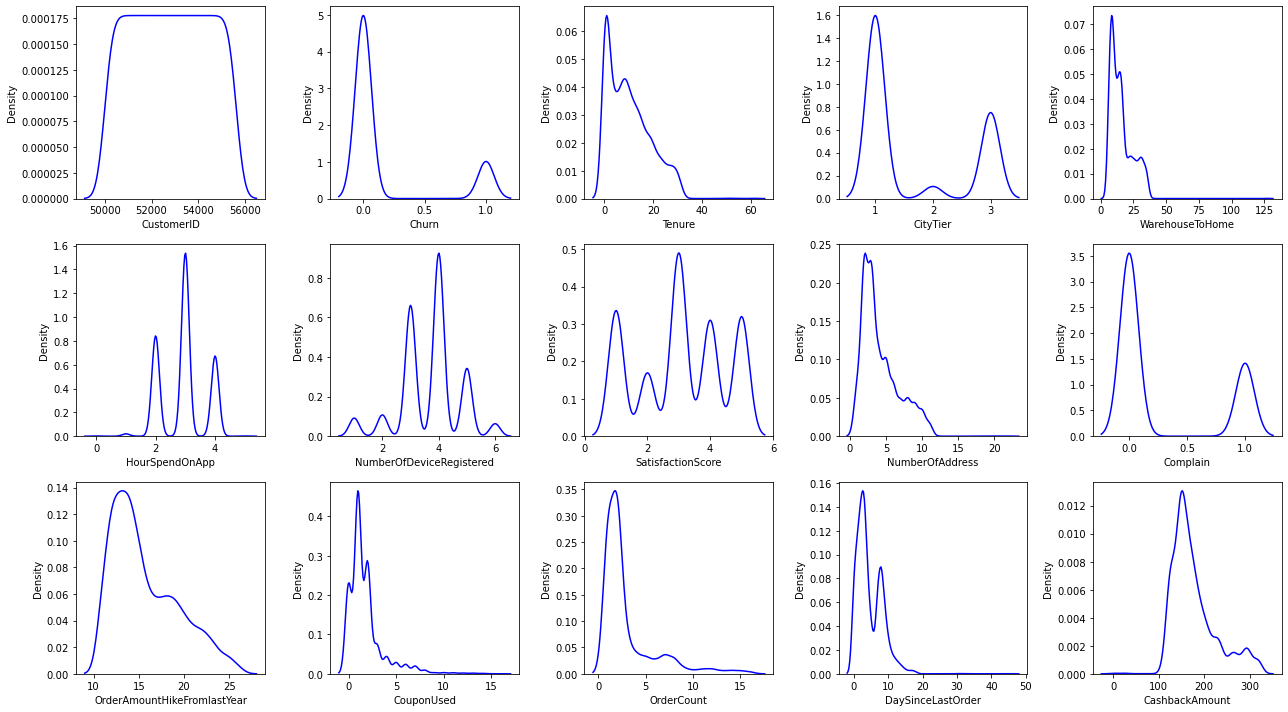

In [14]:
features = nums
plt.figure(figsize=(18, 10))
for i in range(0, len(features)):
    plt.subplot(3, round(len(features)/3), i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:

1. Kolom Churn dan Complain adalah biner, sehingga tidak perlu diperhatikan bentuk distribusinya.
2. Kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder cenderung skewed ke kanan (positively skewed). Berarti ada kemungkinan perlu melakukan sesuatu (action) pada kolom-kolom tersebut nantinya.


### Boxplot

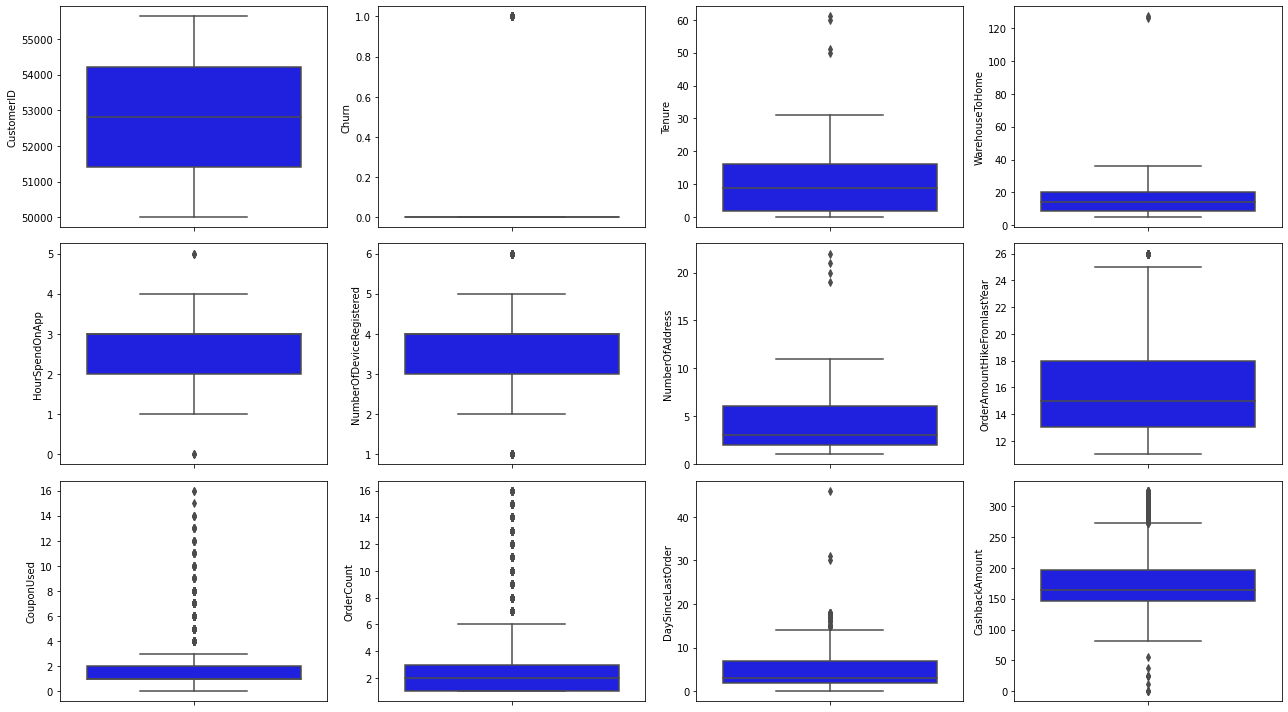

In [15]:
temp_numps = list(filter(lambda x:x not in ['CityTier','SatisfactionScore','Complain'], nums)) # Filter beberapa kolom yang seharusnya merupakan kolom categorical
features = temp_numps
plt.figure(figsize = (18, 10))
for i in range(0, len(features)):
    plt.subplot(3, round(len(features)/3), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.

Pengamatan :
1. Outlier utamanya terlihat pada kolom Tenure, WarehouseToHome, DaySinceLastOrder. Yang mana ketiga kolom tersebut perlu diwaspadai, karena memiliki outlier yang jaraknya jauh.
2. Data simetris (berdistribusi normal) terdapat pada kolom CustomerID.
3. Distribusi data yang cenderung skewed ke kanan (positively skewed) terdapat pada kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder.
4. Distribusi data yang cenderung skewed ke kiri (negatively skewed) terdapat pada kolom CashbackAmount. 

### Categorical Features



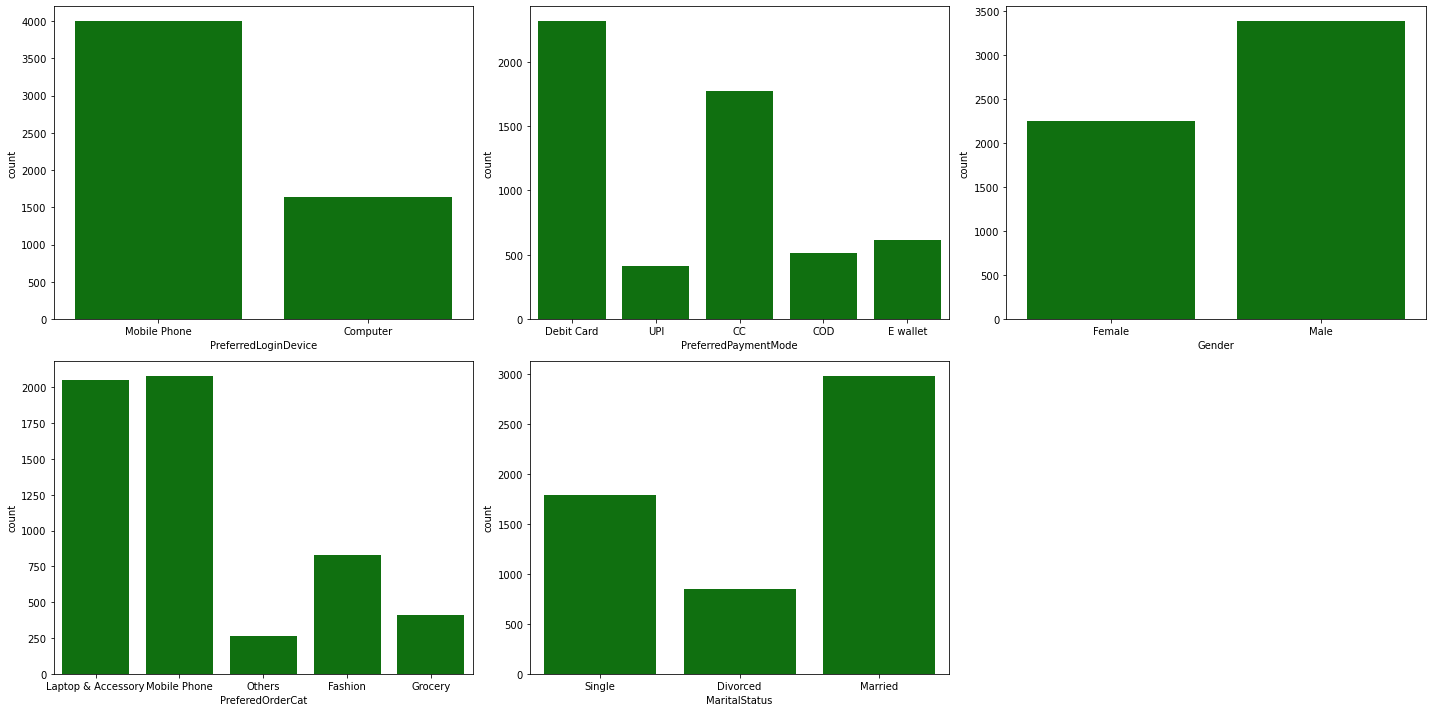

In [16]:
df_sample = df.sample(1000, random_state=50)
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x = df[cats[i]], color='green', orient='v')
  plt.tight_layout()

Pengamatan :
1. Device yang banyak digunakan customer untuk login didominasi oleh Mobile Phone.
2. Metode pembayaran yang dilakukan customer paling banyak melalui Debit Card, kemudian Credit Card.
3. Customer berjenis kelamin laki-laki lebih banyak dibandingkan dengan customer yang berjenis kelamin perempuan.
4. Customer paling banyak melakukan order pada barang berkategori Mobile Phone, dan selanjutnya disusul dengan barang berkategori Laptop & Accessory.
5. Status pernikahan customer didominasi oleh customer dengan status sudah menikah, kemudian yang berstatus lajang dan bercerai.

## **Multivariate Analysis**

### Correlation Heatmap

In [17]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


<AxesSubplot:>

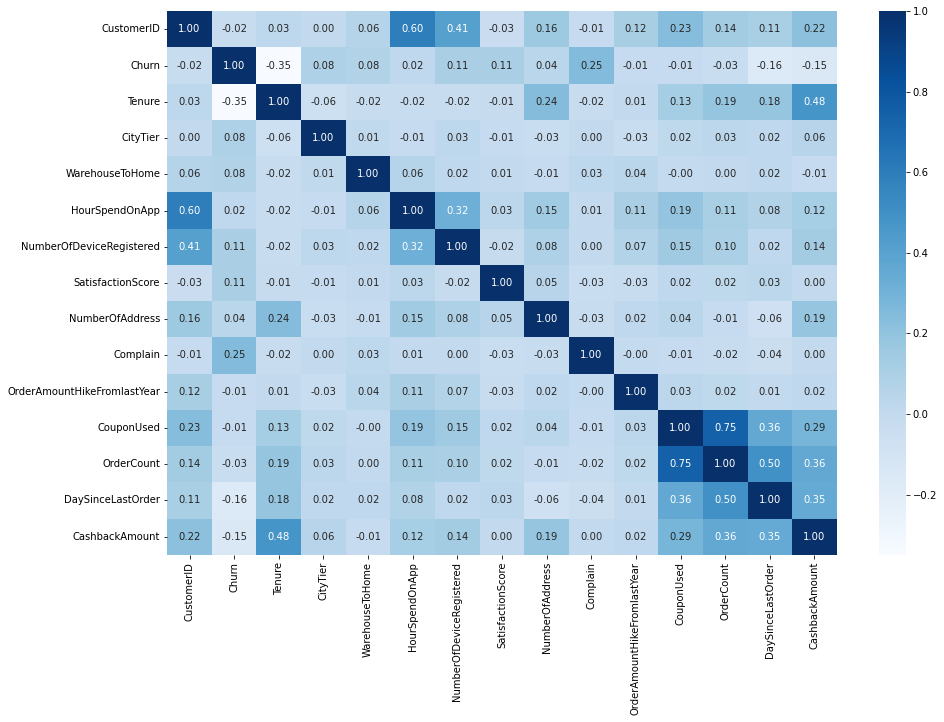

In [18]:
#correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Pengamatan Heatmap di atas adalah :

1. Kolom Churn mempunyai koefisien korelasi tertinggi terhadap Tenure dengan nilai -0.35, diikuti kolom Complain dengan nilai 0.25.
2. CouponUsed memiliki korelasi cukup kuat dengan OrderCount dengan nilai koefisien korelasi 0.75.

<Figure size 1440x1080 with 0 Axes>

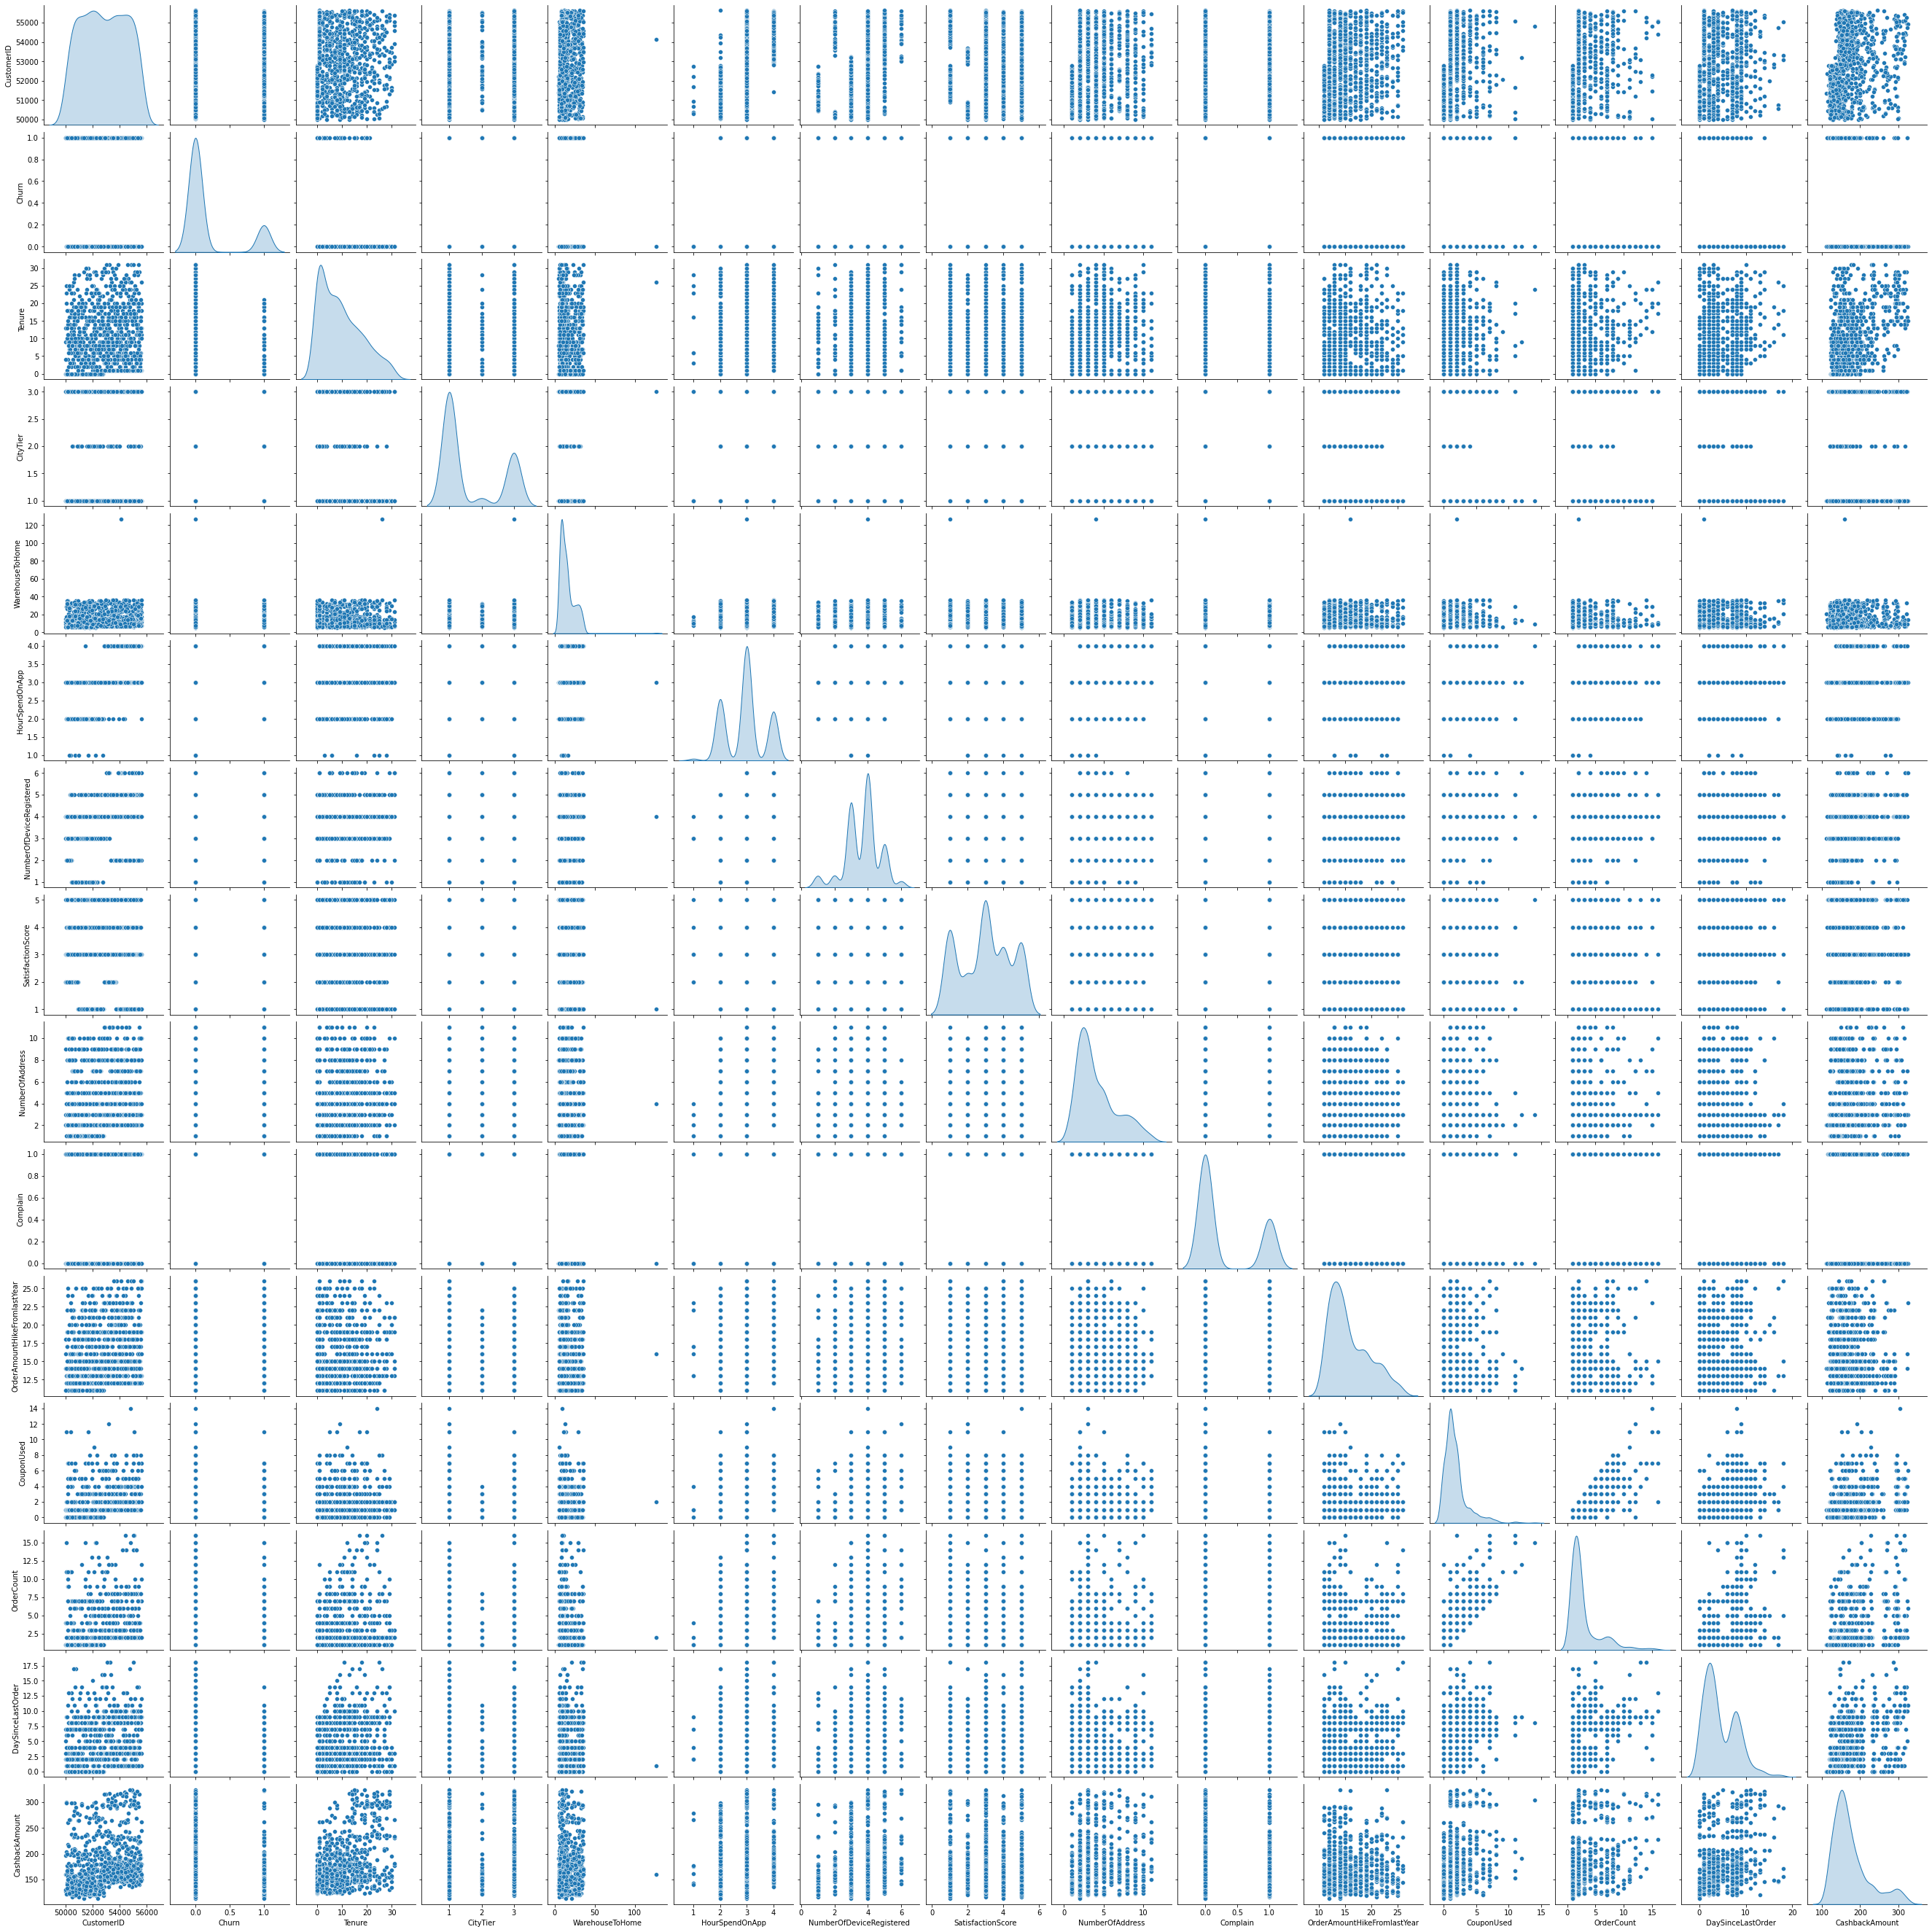

In [19]:
#menggunakan sample dari full dataset
plt.figure(figsize=(20, 15))
sns.pairplot(df_sample, diag_kind='kde')

Dari pair plot di atas, pengamatan yang didapat adalah :
- Churn cenderung dipengaruhi oleh Tenure, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount.
- OrderCount dan CouponUsed terlihat memiliki korelasi yang linear.



##**Nilai Missing Value Dalam Persentase**

In [20]:
#mencari kolom yang memiliki nilai missing value
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [21]:
#mencari nilai persentase dari kolom missing value

list_null = ['Tenure', 'WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
persentase = []
for i in df.isna().sum().to_list():
  if not (i == 0.0):
    persentase.append(str(round((i/5630) * 100,2))+'%')
    
for i,j in zip(list_null, persentase):
  print(f'kolom {i}: {j}')    

kolom Tenure: 4.69%
kolom WarehouseToHome: 4.46%
kolom HourSpendOnApp: 4.53%
kolom OrderAmountHikeFromlastYear: 4.71%
kolom CouponUsed: 4.55%
kolom OrderCount: 4.58%
kolom DaySinceLastOrder: 5.45%


##**EDA Conclusion**

Hal-hal yang ditermukan dari EDA dataset ini adalah :
1. Terdapat beberapa nilai null pada kolom: Tenure sebanyak 4.69%, WarehouseToHome sebanyak 4.46%, HourSpendOnApp sebanyak 4.53%, OrderAmountHikeFromlastYear sebanyak 4.71%, CouponUsed sebanyak 4.55%, OrderCount sebanyak 4.58%, DaySinceLastOrder sebanyak 5.45% sehingga membutuhkan replacement untuk insight lebih lanjut.

2. Terdapat kolom yang memiliki koefision korelasi >= 0.25 yaitu kolom Tenure dan Complain terhadap Churn. Nilai ini dirasa cukup signifikan sehingga kolom tersebut berpotensi untuk dijadikan fitur. 

3. Pada kolom WarehouseTohome, Tenure, dan DaySinceLastOrder terdapat outlier yang perlu diwaspadai karena jaraknya terlalu jauh dari Quartil 1 ataupun Quartil 3.

4. Terdapat distribusi data yang cenderung skewed ke kanan (positively skewed) yaitu pada kolom Tenure, WarehouseToHome, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder.

5. Terdapat distribusi data yang cenderung skewed ke kiri (negatively skewed) yaitu pada kolom CashbackAmount. 


##**Business Insight**

1. Tenure dengan Churn

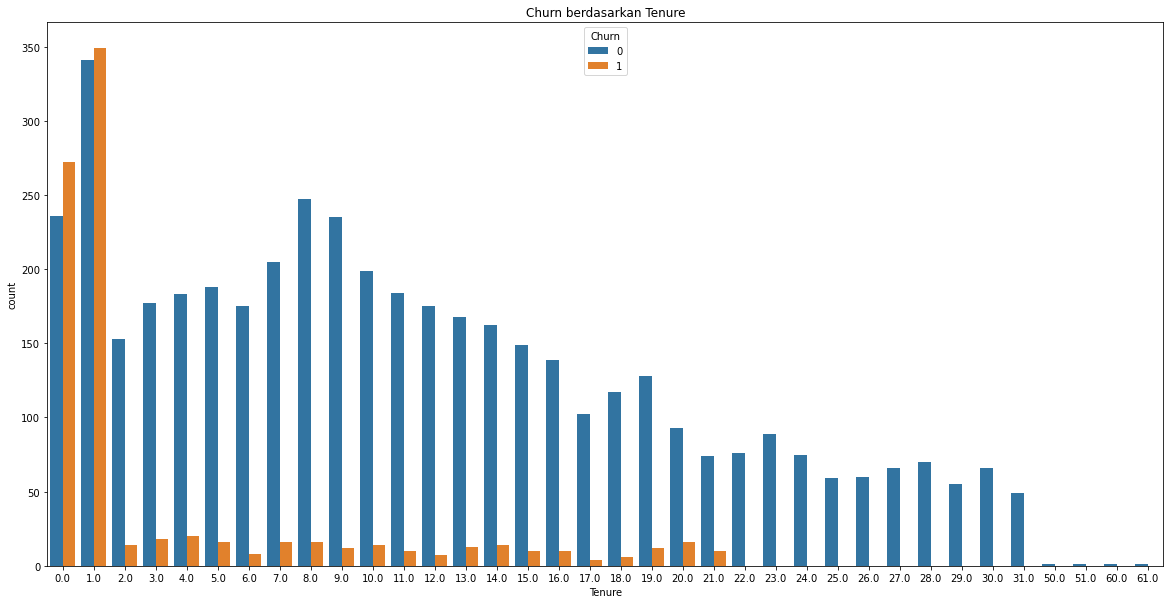

In [22]:
fig = plt.subplots(figsize = (20, 10))
sns.countplot('Tenure', hue = 'Churn', data = df)
plt.title('Churn berdasarkan Tenure')
plt.show()

Berdasarkan grafik di atas bahwa customer yang cenderung churn memiliki masa Tenure yang singkat.

2. PreferedOrderCat dengan Churn

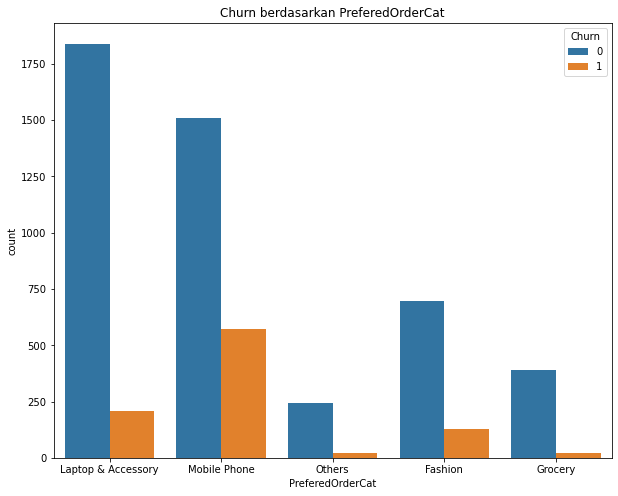

In [23]:
fig = plt.subplots(figsize = (10, 8))
sns.countplot('PreferedOrderCat', hue = 'Churn', data = df)
plt.title('Churn berdasarkan PreferedOrderCat')
plt.show()

Berdasarkan grafik di atas, bahwa customer yang cenderung churn adalah customer yang membeli Mobile Phone dibandingkan kategori lainnya.

3. MaritalStatus dengan Churn

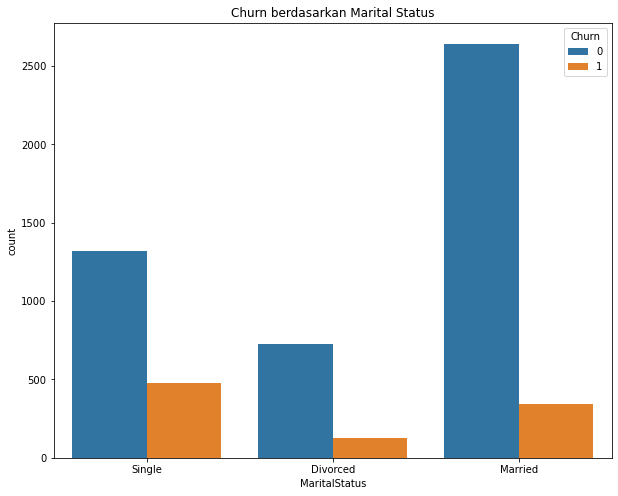

In [24]:
fig = plt.subplots(figsize = (10, 8))
sns.countplot('MaritalStatus', hue = 'Churn', data = df)
plt.title('Churn berdasarkan Marital Status')
plt.show()

Berdasarkan grafik di atas, customer yang berstatus single cenderung churn.

4. Complain dengan Churn

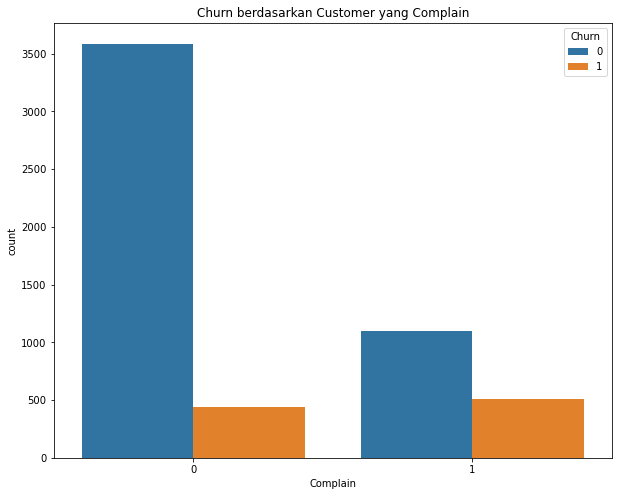

In [25]:
fig = plt.subplots(figsize = (10, 8))
sns.countplot('Complain', hue = 'Churn', data = df)
plt.title('Churn berdasarkan Customer yang Complain')
plt.show()

Berdasarkan grafik di atas, customer yang complain cenderung churn namun tidak berbeda jauh dengan customer yang tidak complain.

## **Handle Missing Values**

*   kolom Tenure: 4.69%
*   kolom WarehouseToHome: 4.46
*   kolom HourSpendOnApp: 4.53%
*   kolom OrderAmountHikeFromlastYear: 4.71%
*   kolom CouponUsed: 4.55%
*   kolom OrderCount: 4.58%
*   kolom DaySinceLastOrder: 5.45%

Pengamatan :

Berdasarkan hasil persentase missing value di atas, maka kami memutuskan untuk tidak melakukan drop karena persentase missing value yang cukup besar sehingga kami memutuskan untuk melakukan imputasi pada setiap kolom missing values.

## **Pengecekan distribusi terhadap setiap kolom missing values (persiapan sebelum menentukan imputasi)**

Ada 7 kolom missing values :

    1. Tenure
    2. WarehouseToHome
    3. HourSpendOnApp
    4. OrderAmountHikeFromlastYear
    5. CouponUsed
    6. OrderCount
    7. DaySinceLastOrder

In [26]:
nums

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [27]:
cats

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


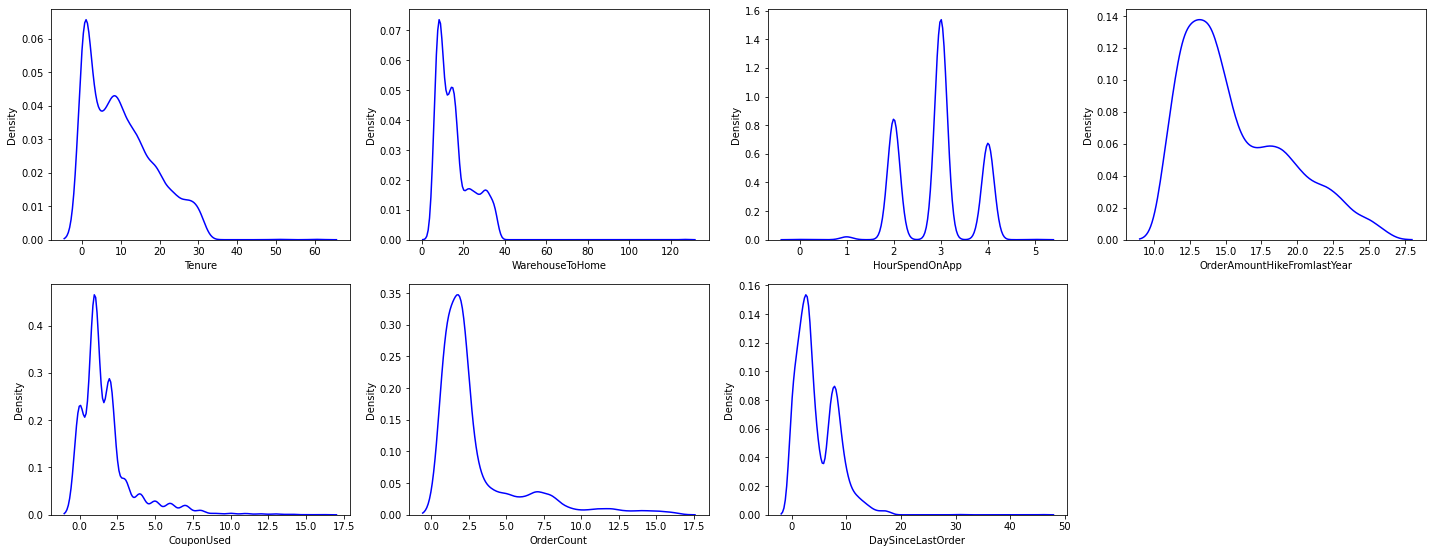

In [29]:
#Distribution Missing Value untuk Action Selanjutnya (Imputasi)
nums_missing_values = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
features = nums_missing_values
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

Pengamatan :
    
Berdasarkan distribution plot di atas, ada 6 kolom yang distribusinya tampak skewed ke kanan (positively skewed) yaitu kolom : Tenure, WarehouseToHome, OrderAmountHikeFromlastYear, CouponUsed, OrderCount dan DaySinceLastOrder. Sedangkan untuk kolom HourSpendOnApp tidak skewed. Pada akhirnya, kami memutuskan untuk melakukan imputasi median terhadap 6 kolom tersebut karena median robust terhadap outlier sedangkan untuk kolom HourSpendOnApp kami melakukan imputasi modus.

### Melakukan imputasi terhadap kolom missing values

In [30]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

### Cek jumlah missing values setelah imputasi

In [31]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Pengamatan : Sudah tidak ada missing values pada setiap kolom

## **Handle Duplicated Data**

In [32]:
df.duplicated().any()

False

In [33]:
df['CustomerID'].duplicated().any()

False

In [34]:
df.duplicated().sum()

0

Pengamatan : Tidak ada data yang duplikat.

### Cek Tipe Data Tiap Kolom

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Mengubah Tipe Data Kolom CouponUsed, OrderCount, DaySinceLastOrder menjadi Integer

In [36]:
df['CouponUsed'] = pd.to_numeric(df['CouponUsed'], downcast='signed')
df.dropna(subset=['CouponUsed'], inplace=True)

In [37]:
df['OrderCount'] = pd.to_numeric(df['OrderCount'], downcast='integer')
df.dropna(subset=['OrderCount'], inplace=True)

In [38]:
df['DaySinceLastOrder'] = pd.to_numeric(df['DaySinceLastOrder'], downcast='signed')
df.dropna(subset=['DaySinceLastOrder'], inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Pengamatan : 

Tipe data pada kolom CouponUsed, OrderCount, DaySinceLastOrder sudah berubah menjadi integer.

## **Handle Outliers**

### Boxplot Sebelum Handle Outliers

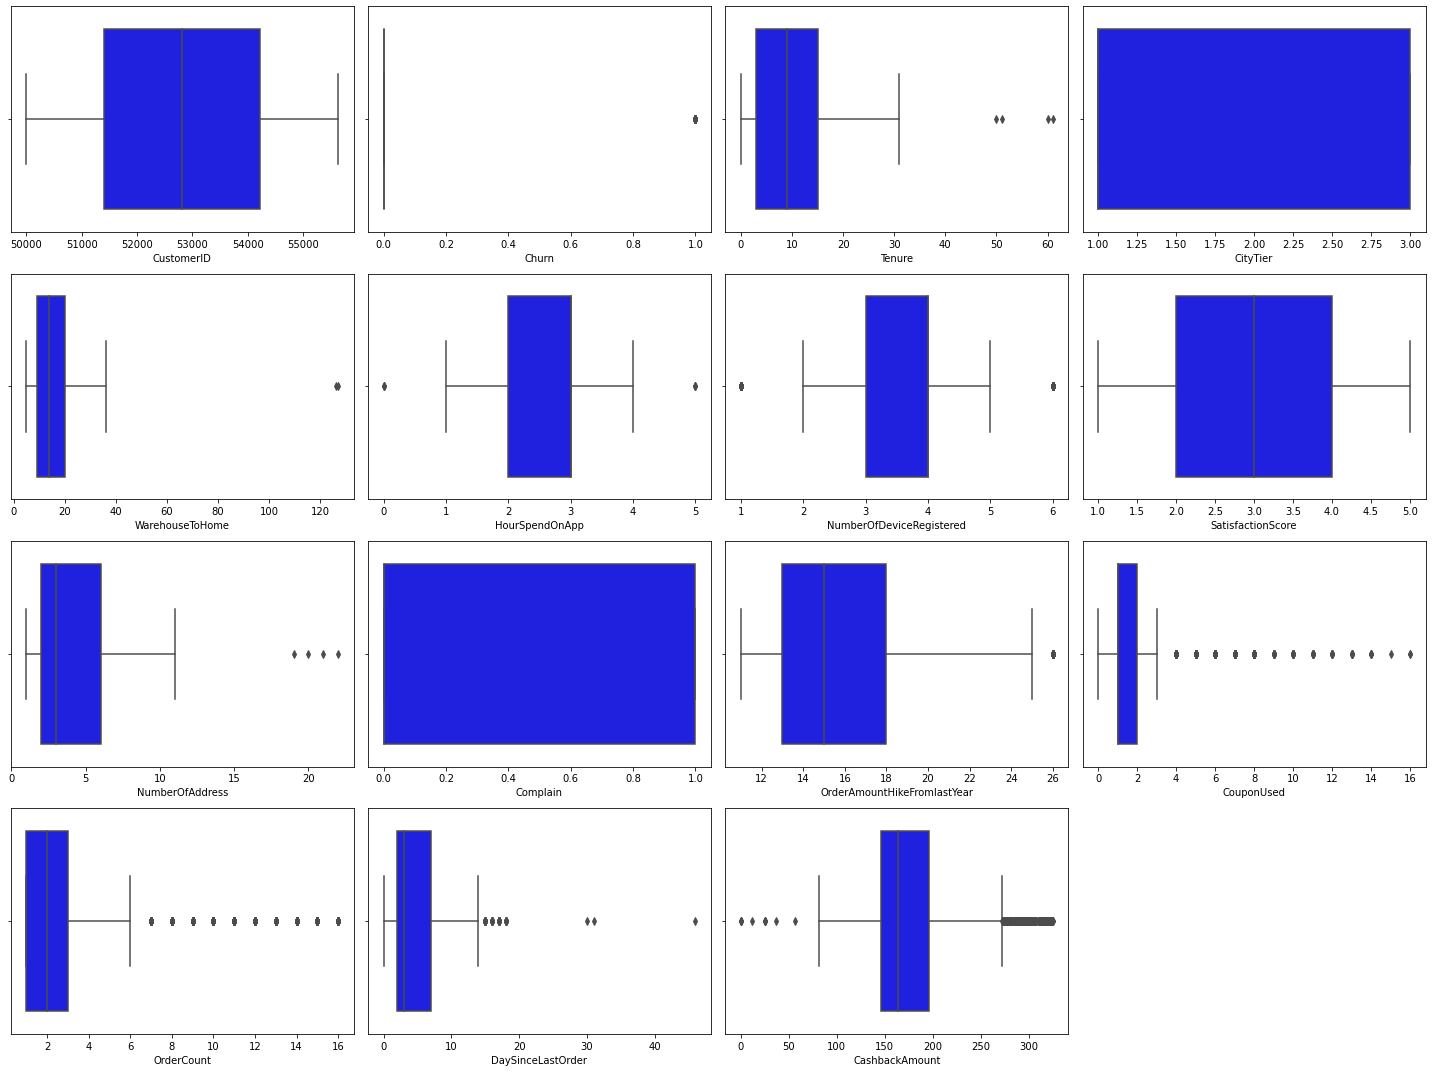

In [40]:
features = nums
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

Terlihat bahwa boxplot pada kolom Tenure, WarehouseToHome, DaySinceLastOrder memiliki outlier yang berbahaya karena range titik-titiknya sangat jauh sehingga harus dilakukan penanganan terhadap kolom-kolom tersebut.

### Handling Outliers


Menggunakan Z-Score untuk mengatasi outlier

In [41]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # Menghitung nilai absolute Z-score
    filtered_entries = (zscore < 3) & filtered_entries # Keep yang kurang dari 3 nilai absolute Z-scorenya
    
df = df[filtered_entries] # filter untuk mengambil yang nilai Z-score yang dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


### Boxplot Setelah Handle Outliers


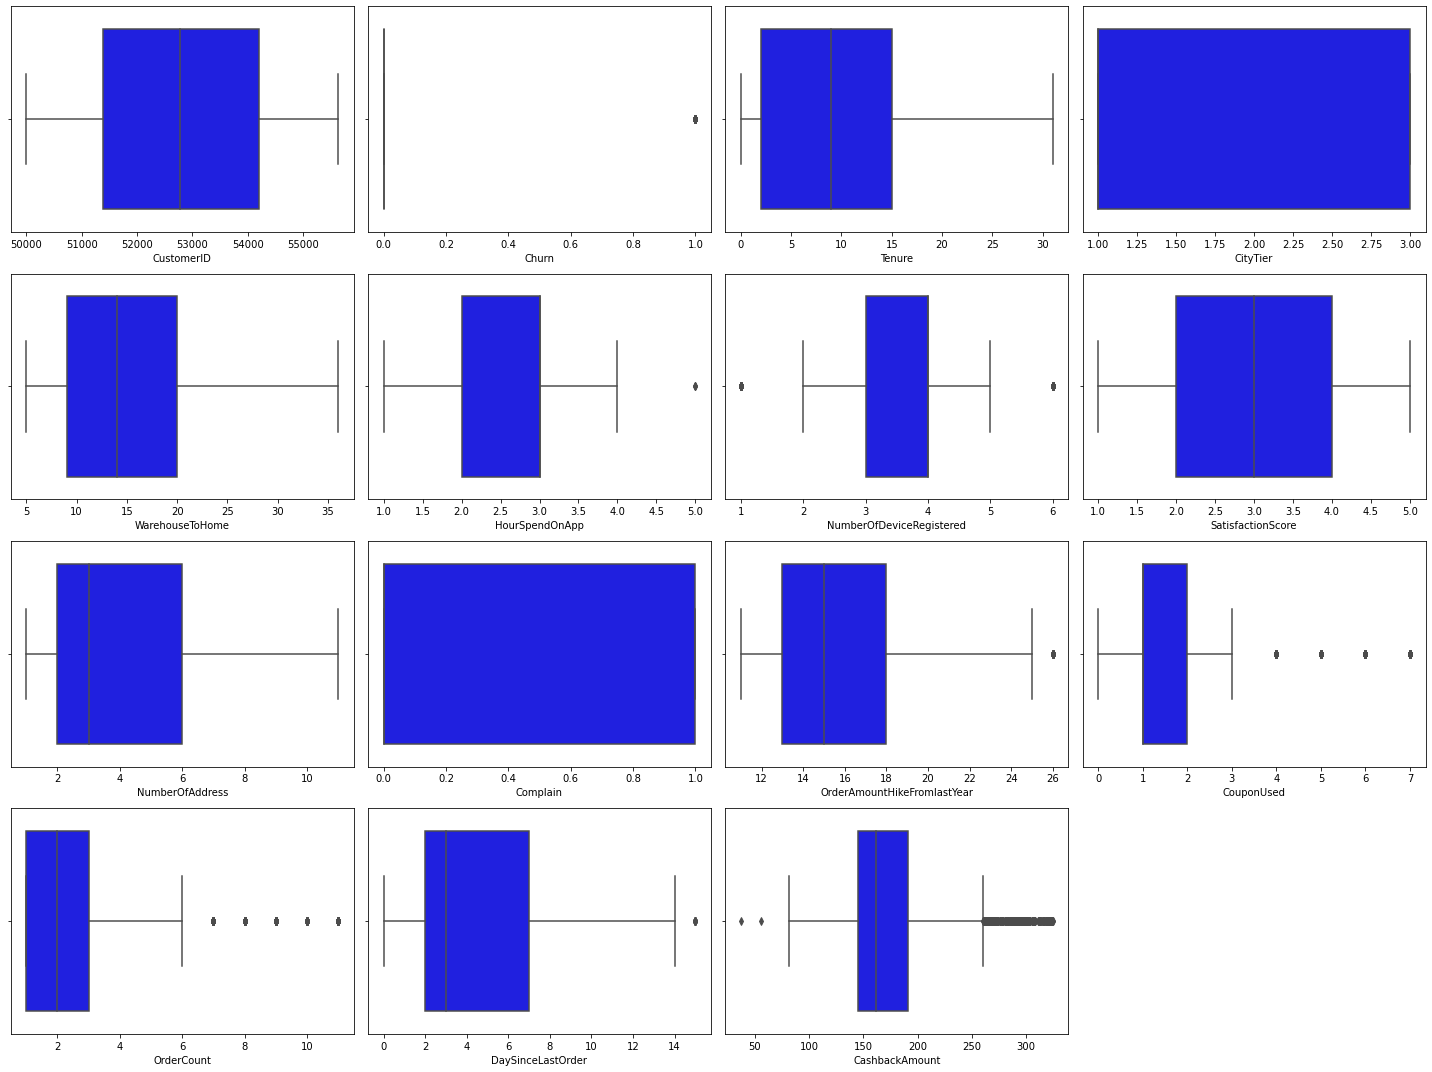

In [42]:
features = nums
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

 Terlihat bahwa tiap kolom sudah tidak terlalu terpengaruh dengan outlier, karena range titik-titik sudah lebih rapat.

## **Feature Transformation**


In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


### Log Transformation

<AxesSubplot:xlabel='WarehouseToHome', ylabel='Density'>

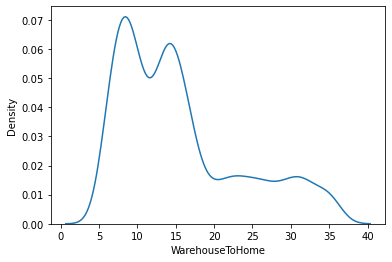

In [44]:
#Distribusi WarehouseToHome nilai asli
sns.kdeplot(df['WarehouseToHome'])

<AxesSubplot:xlabel='WarehouseToHome', ylabel='Density'>

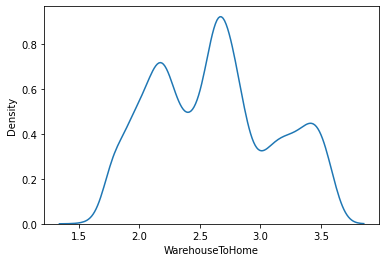

In [45]:
#Distribusi WarehouseToHome setelah Log Transformation
sns.kdeplot(np.log(df['WarehouseToHome']))

In [46]:
#Transformasi WarehouseToHome
df['log_warehousetoHome'] = np.log(df['WarehouseToHome'])

In [47]:
#Drop kolom WarehouseToHome
df = df.drop(columns = 'WarehouseToHome')

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

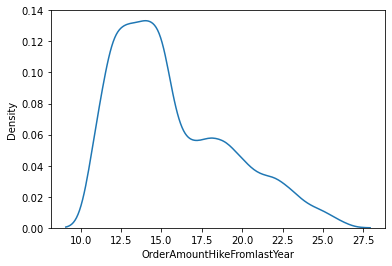

In [48]:
#Distribusi OrderAmountHikeFromlastYear nilai asli
sns.kdeplot(df['OrderAmountHikeFromlastYear'])

<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

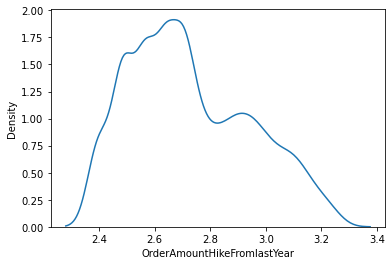

In [49]:
#Distribusi OrderAmountHikeFromlastYear setelah Log Transformation
sns.kdeplot(np.log(df['OrderAmountHikeFromlastYear']))

In [50]:
#Transformasi OrderAmountHikeFromlastYear
df['log_orderamounthikefromlastyear'] = np.log(df['OrderAmountHikeFromlastYear'])

In [51]:
#Drop kolom OrderAmountHikeFromlastYear
df = df.drop(columns = 'OrderAmountHikeFromlastYear')

<AxesSubplot:xlabel='OrderCount', ylabel='Density'>

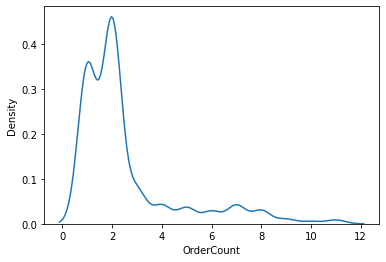

In [52]:
#Distribusi OrderCount nilai asli
sns.kdeplot(df['OrderCount'])

<AxesSubplot:xlabel='OrderCount', ylabel='Density'>

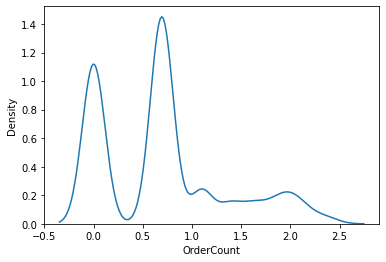

In [53]:
#Distribusi OrderCount setelah Log Transformation
sns.kdeplot(np.log(df['OrderCount']))

In [54]:
#Transformasi OrderCount
df['log_ordercount'] = np.log(df['OrderCount'])

In [55]:
#Drop kolom OrderCount
df = df.drop(columns = 'OrderCount')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.000000,51394.250000,52784.500000,54208.750000,55630.000000
Churn,5350.0,0.170467,0.376078,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5350.0,9.804112,8.178609,0.000000,2.000000,9.000000,15.000000,31.000000
CityTier,5350.0,1.652710,0.913816,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5350.0,2.929720,0.701942,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5350.0,3.056449,1.378802,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449,2.544520,1.000000,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,0.286355,0.452100,0.000000,0.000000,0.000000,1.000000,1.000000
CouponUsed,5350.0,1.522243,1.411624,0.000000,1.000000,1.000000,2.000000,7.000000


### Normalisasi

In [57]:
#Normalisasi Tenure, CouponUsed, DaySinceLastOrder

df['tenure_norm'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['couponused_norm'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
df['daysincelastorder_norm'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))

### Standardization

In [58]:
#Standardisasi HourSpendOnApp, CashbackAmount, WarehouseToHome dan OrderAmountHikeFromlastYear

df['HourSpendOnApp_std'] = StandardScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
df['CashbackAmount_std'] = StandardScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))
df['log_warehousetoHome_std'] = StandardScaler().fit_transform(df['log_warehousetoHome'].values.reshape(len(df), 1))
df['log_orderamounthikefromlastyear_std'] = StandardScaler().fit_transform(df['log_orderamounthikefromlastyear'].values.reshape(len(df), 1))

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,5.280283e+04,1627.280475,50001.000000,51394.250000,52784.500000,54208.750000,55630.000000
Churn,5350.0,1.704673e-01,0.376078,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5350.0,9.804112e+00,8.178609,0.000000,2.000000,9.000000,15.000000,31.000000
CityTier,5350.0,1.652710e+00,0.913816,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5350.0,2.929720e+00,0.701942,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5350.0,3.675140e+00,1.026057,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5350.0,3.056449e+00,1.378802,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449e+00,2.544520,1.000000,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,2.863551e-01,0.452100,0.000000,0.000000,0.000000,1.000000,1.000000
CouponUsed,5350.0,1.522243e+00,1.411624,0.000000,1.000000,1.000000,2.000000,7.000000


##**Feature Extraction**

### Added New Feature for Feature Extraction

In [60]:
def kelompok(tenure):
    if tenure < 13:
        return "0-12 months"
    elif tenure < 25:
        return "13-24 months"
    else:
        return ">24 months"

df["kelompok_tenure"] = df["Tenure"].apply(kelompok)

In [61]:
def feature_extraction(feature, rotation=0, title='', xlabel=''):
    temp_count = df[feature].value_counts()
    temp_pct = df[feature].value_counts(normalize=True)
    df_temp_count = pd.DataFrame({
        feature:temp_count.index,
        'Total':temp_count.values,
        '% Values':(temp_pct * 100)}) 

    print(df_temp_count)

    
    cat_pct = df[[feature, 'Churn']].groupby([feature],as_index=False).mean()
    cat_pct['Churn'] = round((cat_pct['Churn'] * 100), 2)
    cat_pct.sort_values('Churn', ascending=False, inplace=True)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))
    s =  sns.countplot(data=df, x=feature, ax=ax1, hue='Churn', order=cat_pct[feature], palette=['b', 'r'])

    
    ax1.set_title('Distribusi oleh ' + title, fontdict=({'fontsize':20, 'fontweight':5, 'color':'black'}))
    ax1.set_xlabel(feature + xlabel, fontsize=15)
    ax1.legend(['Not Churn', 'Churn'])
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)

    
    x = np.arange(len(cat_pct[feature]))
    y = cat_pct['Churn']
    for i, v in enumerate(y):
        ax2.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

    s = sns.barplot(data=cat_pct, x=feature, y='Churn', ax=ax2, order=cat_pct[feature])
    
    ax2.set_title('Churn Rate (%) by ' + title, fontdict={'fontsize' : 20, 'fontweight' : 5, 'color' : 'black'})
    ax2.set_ylabel('Percent of Churn')
    ax2.set_xlabel(feature + xlabel, fontsize=15)
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)
    plt.show()

             kelompok_tenure  Total   % Values
0-12 months      0-12 months   3651  68.242991
13-24 months    13-24 months   1319  24.654206
>24 months        >24 months    380   7.102804


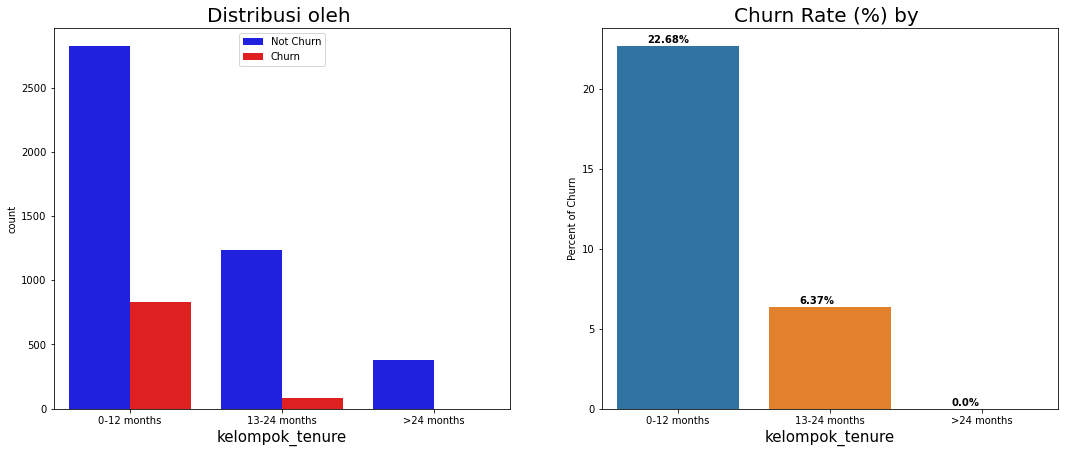

In [62]:
feature_extraction('kelompok_tenure')

## **Feature Encoding**

In [63]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'Complain']

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5350 non-null   int64  
 1   Churn                                5350 non-null   int64  
 2   Tenure                               5350 non-null   float64
 3   PreferredLoginDevice                 5350 non-null   object 
 4   CityTier                             5350 non-null   int64  
 5   PreferredPaymentMode                 5350 non-null   object 
 6   Gender                               5350 non-null   object 
 7   HourSpendOnApp                       5350 non-null   float64
 8   NumberOfDeviceRegistered             5350 non-null   int64  
 9   PreferedOrderCat                     5350 non-null   object 
 10  SatisfactionScore                    5350 non-null   int64  
 11  MaritalStatus                 

In [65]:
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3803
Computer        1547
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card    2195
CC            1686
E wallet       579
COD            489
UPI            401
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3214
Female    2136
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2053
Laptop & Accessory    2000
Fashion                752
Grocery                332
Others                 213
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2825
Single      1722
Divorced     803
Name: MaritalStatus, dtype: int64
------------------------------ 

value counts of column CityTier
1    3485
3    1627
2     238
Name: CityTier, dtype: int64
----------------

Strategi Encoding :

*   Ordinal Encoding : kelompok_tenure
*   Label Encoding : PreferredLoginDevice, Gender
*   One Hot Encoding : PreferredPaymentMode, PreferedOrderCat, MaritalStatus



In [66]:
encoder = ce.OrdinalEncoder(cols='kelompok_tenure', return_df=True,
                           mapping=[{'col':'kelompok_tenure', 
                           'mapping':{
                               None:0, 
                               '0-12 months':1, # dekat =1
                               '13-24 months':2, # sedang = 2 
                               '>24 months':3}}]) # jauh = 3

df = encoder.fit_transform(df)
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,log_orderamounthikefromlastyear,log_ordercount,tenure_norm,couponused_norm,daysincelastorder_norm,HourSpendOnApp_std,CashbackAmount_std,log_warehousetoHome_std,log_orderamounthikefromlastyear_std,kelompok_tenure
0,50001,1,4.0,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,...,2.397895,0.000000,0.129032,0.142857,0.333333,0.100132,-0.314876,-1.653622,-1.512454,1
1,50002,1,9.0,Mobile Phone,1,UPI,Male,3.0,4,Mobile Phone,...,2.708050,0.000000,0.290323,0.000000,0.000000,0.100132,-1.153765,-1.077338,-0.086555,1
2,50003,1,9.0,Mobile Phone,1,Debit Card,Male,2.0,4,Mobile Phone,...,2.639057,0.000000,0.290323,0.000000,0.200000,-1.324620,-1.167091,1.570402,-0.403741,1
3,50004,1,0.0,Mobile Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,...,3.135494,0.000000,0.000000,0.000000,0.200000,-1.324620,-0.870696,0.181890,1.878567,1
4,50005,1,0.0,Mobile Phone,1,CC,Male,3.0,3,Mobile Phone,...,2.397895,0.000000,0.000000,0.142857,0.200000,0.100132,-0.966772,-0.265111,-1.512454,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,CC,Male,3.0,2,Laptop & Accessory,...,2.890372,0.693359,0.322581,0.142857,0.266667,0.100132,-0.513045,1.570402,0.751647,1
5626,55627,0,13.0,Mobile Phone,1,CC,Male,3.0,5,Fashion,...,2.772589,0.693359,0.419355,0.142857,0.200000,0.100132,1.081769,-0.104769,0.210153,2
5627,55628,0,1.0,Mobile Phone,1,Debit Card,Male,3.0,2,Laptop & Accessory,...,3.044522,0.693359,0.032258,0.142857,0.266667,0.100132,0.254486,-0.439412,1.460335,1
5628,55629,0,23.0,Computer,3,CC,Male,4.0,5,Laptop & Accessory,...,2.708050,0.693359,0.741935,0.285714,0.600000,1.524884,0.092855,-0.841395,-0.086555,2


In [67]:
mapping_login = {'Mobile Phone' : 0,
                 'Computer': 1}
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(mapping_login)

In [68]:
mapping_gender = {'Male' : 0,
                  'Female': 1}
df['Gender'] = df['Gender'].map(mapping_gender)


In [69]:
for cat in ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']:
  ohe = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(ohe)

In [70]:
# drop kolom yang tidak diperlukan
df = df.drop(columns=['CustomerID', 'CouponUsed', 'HourSpendOnApp', 'PreferredPaymentMode', 'CashbackAmount', 'PreferedOrderCat', 'MaritalStatus', 'DaySinceLastOrder', 'Tenure', 'log_warehousetoHome', 'log_orderamounthikefromlastyear'])
df.head()

,Churn,PreferredLoginDevice,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,log_ordercount,tenure_norm,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,3,1,3,2,9,1,0.0,0.129032,...,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,4,3,7,1,0.0,0.290323,...,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,4,3,6,1,0.0,0.290323,...,0,0,0,0,0,1,0,0,0,1
3,1,0,3,0,4,5,8,0,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,3,5,3,0,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5350 non-null   int64  
 1   PreferredLoginDevice                 5350 non-null   int64  
 2   CityTier                             5350 non-null   int64  
 3   Gender                               5350 non-null   int64  
 4   NumberOfDeviceRegistered             5350 non-null   int64  
 5   SatisfactionScore                    5350 non-null   int64  
 6   NumberOfAddress                      5350 non-null   int64  
 7   Complain                             5350 non-null   int64  
 8   log_ordercount                       5350 non-null   float16
 9   tenure_norm                          5350 non-null   float64
 10  couponused_norm                      5350 non-null   float64
 11  daysincelastorder_norm        

##**Handle Class Imbalance**

In [72]:
df['Churn'].value_counts()

0    4438
1     912
Name: Churn, dtype: int64

In [73]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Churn']]]
y = df['Churn'].values
print(X.shape)
print(y.shape)

(5350, 29)
(5350,)


In [74]:
X['Gender'].unique()

array([1, 0], dtype=int64)

In [75]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [76]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
dtype: int64
UNDERSAMPLING
0    1824
1     912
dtype: int64
OVERSAMPLING
0    4438
1    2219
dtype: int64
SMOTE
0    4438
1    2219
dtype: int64


Kami memutuskan untuk menggunakan teknik SMOTE yang akan diujikan ke data train. Kemudian perlakuan untuk data test akan diuji setelah data train hasil SMOTE sudah dilakukan (akan dijelaskan di Stage 3).

##**Feature Selection**

In [77]:
xgb = XGBClassifier(eval_metric='error')

In [78]:
skf = StratifiedKFold(n_splits=5)

rfe = RFECV(xgb, cv=skf, scoring='accuracy', n_jobs=-1)
rfe = rfe.fit(X, y)

In [79]:
pd.DataFrame({'ranking':rfe.ranking_}, index=rfe.feature_names_in_).sort_values('ranking')


,ranking
PreferredLoginDevice,1
PreferedOrderCat_Others,1
PreferedOrderCat_Mobile Phone,1
PreferedOrderCat_Laptop & Accessory,1
PreferedOrderCat_Fashion,1
PreferredPaymentMode_E wallet,1
PreferredPaymentMode_COD,1
PreferredPaymentMode_CC,1
MaritalStatus_Married,1
log_warehousetoHome_std,1


In [80]:
# list of relevant features
relevant_column = list(X.columns[rfe.support_])

# Filtering feature from RFE
df_rfe = df[relevant_column]
# Assign target
df_rfe['Churn'] = y
df_rfe

,PreferredLoginDevice,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,log_ordercount,tenure_norm,daysincelastorder_norm,HourSpendOnApp_std,...,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_E wallet,PreferedOrderCat_Fashion,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Churn
0,0,3,3,2,9,1,0.000000,0.129032,0.333333,0.100132,...,0,0,0,0,1,0,0,0,1,1
1,0,1,4,3,7,1,0.000000,0.290323,0.000000,0.100132,...,0,0,0,0,0,1,0,0,1,1
2,0,1,4,3,6,1,0.000000,0.290323,0.200000,-1.324620,...,0,0,0,0,0,1,0,0,1,1
3,0,3,4,5,8,0,0.000000,0.000000,0.200000,-1.324620,...,0,0,0,0,1,0,0,0,1,1
4,0,1,3,5,3,0,0.000000,0.000000,0.200000,0.100132,...,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1,1,2,1,6,0,0.693359,0.322581,0.266667,0.100132,...,1,0,0,0,1,0,0,1,0,0
5626,0,1,5,5,6,0,0.693359,0.419355,0.200000,0.100132,...,1,0,0,1,0,0,0,1,0,0
5627,0,1,2,4,3,1,0.693359,0.032258,0.266667,0.100132,...,0,0,0,0,1,0,0,1,0,0
5628,1,3,5,4,4,0,0.693359,0.741935,0.600000,1.524884,...,1,0,0,0,1,0,0,1,0,0


##**Feature Tambahan**

Fitur Tambahan yang dirasa bisa membantu performa model:
1. Age
2. TotalSuccesfulTransaction
3. EstimatedSalary    
4. Geography(Location)
5. TotalBalance

##**Modeling**

### Split Data, Train and Test




In [81]:
# Complain dan Tenure <<< Fitur
# Churn <<< Target
df_rfe['tenure_norm']

0       0.129032
1       0.290323
2       0.290323
3       0.000000
4       0.000000
          ...   
5625    0.322581
5626    0.419355
5627    0.032258
5628    0.741935
5629    0.258065
Name: tenure_norm, Length: 5350, dtype: float64

In [82]:
X = df_rfe.drop(columns=['Churn'])
y = df_rfe['Churn'] # target / label
    
print(X.shape)
print(y.shape)

(5350, 22)
(5350,)


In [83]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [84]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

In [85]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
Name: Churn, dtype: int64
UNDERSAMPLING
0    646
1    646
Name: Churn, dtype: int64
OVERSAMPLING
0    3099
1    3099
Name: Churn, dtype: int64
SMOTE
0    3099
1    3099
Name: Churn, dtype: int64


### Oversampling menggunakan SMOTE

In [86]:
# oversampling
X_train_over, y_train_over = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

# distribution target after oversampling
pd.Series(y_train_over).value_counts()

0    3099
1    3099
Name: Churn, dtype: int64

Komposisi data sudah balance dan siap untuk dimodelling

### Modelling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

In [87]:
# import library untuk modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 

### Choose Best Classifier

In [88]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

### Cross Validation

Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation. Hal ini dilakukan untuk memprediksi hasil model yang terbaik dan akan digunakan.

In [90]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [91]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.986916,0.981308,0.994393,0.987850,0.994393
RandomForestClassifier,0.996262,0.985047,0.993458,0.989720,0.986916
AdaBoostClassifier,0.885981,0.892523,0.898131,0.901869,0.899065
ExtraTreesClassifier,0.995327,0.992523,0.992523,0.998131,0.988785
GradientBoostingClassifier,0.915888,0.914019,0.920561,0.917757,0.922430
BaggingClassifier,0.988785,0.980374,0.989720,0.983178,0.985047
KNeighborsClassifier,0.931776,0.916822,0.912150,0.920561,0.926168
LogisticRegression,0.886916,0.885047,0.902804,0.898131,0.895327
GaussianNB,0.773832,0.827103,0.791589,0.794393,0.815888
SVC,0.876636,0.874766,0.885047,0.893458,0.887850


Indeks 0 - 4 di atas adalah banyaknya percobaan yang dilakukan. Dalam hal ini, kami menggunakan k-fold dengan k = 5 yang artinya melakukan 5 kali percobaan dalam menguji dataset. Hal ini dilakukan agar dapat memprediksi hasil performa model yang terbaik untuk digunakan. Dari hasil tersebut terlihat bahwa `XGBClassifier` memiliki performa yang realtif stabil 0.99... di setiap percobaan sehingga kemungkinan untuk menggunakan XGBClassifier semakin besar. Namun, hasil 5 percobaan di atas nantinya akan dihitung berdasarkan rata-rata setiap model sehingga nantinya model yang memiliki performa terbaik yang akan digunakan.

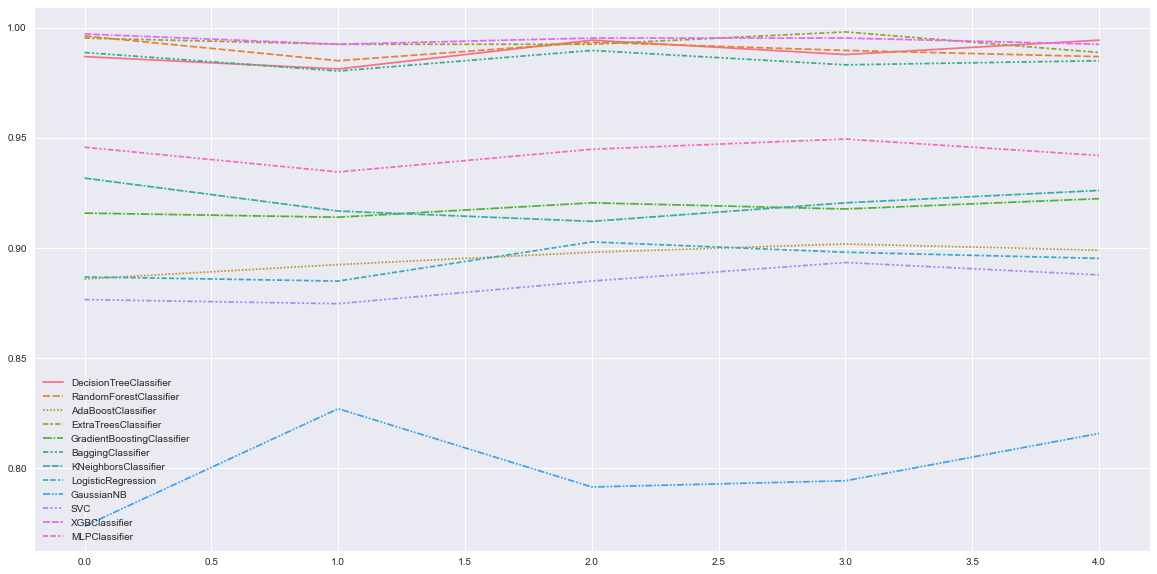

In [92]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

In [93]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [94]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [95]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
XGBClassifier,0.994579,0.001812
ExtraTreesClassifier,0.993458,0.003128
RandomForestClassifier,0.990280,0.004121
DecisionTreeClassifier,0.988972,0.004959
BaggingClassifier,0.985421,0.003477
MLPClassifier,0.943364,0.005002
KNeighborsClassifier,0.921495,0.006893
GradientBoostingClassifier,0.918131,0.003049
AdaBoostClassifier,0.895514,0.005651
LogisticRegression,0.893645,0.006724


Pada eksperimen diatas didapatkan nilai rata-rata akurasi dan standard deviasinya dari setiap model. Berdasarkan hasil tersebut, XGBClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 0.994579 dengan standard deviasi 0.001812

### Fit and Evaluation

Selain dengan menggunakan Cross Validation, kami juga melakukan uji nilai akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data dilakukan training dan testing serta melihat perbedaaannya.



In [96]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [97]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
XGBClassifier,1.000000,0.969470,0.030530
RandomForestClassifier,1.000000,0.961994,0.038006
DecisionTreeClassifier,1.000000,0.961371,0.038629
ExtraTreesClassifier,1.000000,0.958879,0.041121
BaggingClassifier,0.998131,0.965109,0.033022
MLPClassifier,0.966088,0.933333,0.032755
GradientBoostingClassifier,0.934846,0.925234,0.009613
KNeighborsClassifier,0.928705,0.880374,0.048331
AdaBoostClassifier,0.891055,0.904673,0.013618
LogisticRegression,0.889453,0.897819,0.008367


Terlihat bahwa `XGBClassifier` memiliki perbedaan nilai akurasi terkecil yaitu 3.05% sehingga kemungkinan `XGBClassifier` bisa digunakan untuk mendapatkan performa yang baik.

### Cross Validation for Some Metrics

Mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [98]:
skfold = StratifiedKFold(n_splits=5)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [99]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics

df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,XGBClassifier,0.945674,0.018759,0.994579,0.982861,0.985726,0.984105
1,ExtraTreesClassifier,0.540382,0.047910,0.993645,0.998857,0.963802,0.980922
2,RandomForestClassifier,0.635584,0.047851,0.991776,0.994375,0.957221,0.975343
3,DecisionTreeClassifier,0.032002,0.012803,0.988598,0.959388,0.975872,0.967161
4,BaggingClassifier,0.212476,0.016532,0.984860,0.973943,0.936348,0.954514
5,MLPClassifier,6.918357,0.012587,0.950093,0.898639,0.797220,0.844636
6,KNeighborsClassifier,0.006252,0.154846,0.921495,0.875081,0.629382,0.732066
7,GradientBoostingClassifier,0.848097,0.009378,0.918131,0.840324,0.643632,0.728302
8,AdaBoostClassifier,0.339651,0.028133,0.895514,0.745199,0.587792,0.656840
9,LogisticRegression,0.090700,0.006744,0.893645,0.791489,0.512196,0.619974


Dari hasil diatas, `XGBClassifier` memiliki nilai akurasi dan dan recall yang paling tinggi dari keseluruhan model. Pada kasus ini selain nilai akurasi yang kita perhitungkan, recall juga akan kita perhitungkan karena kita lebih ingin model kita dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative. FP pada kasus ini yaitu model memprediksi customer akan mengalami churn, tetapi sebenarnya tidak churn. Maka FP lebih baik daripada FN. FN yaitu model memprediksi customer tidak akan churn tetapi sebenarnya churn, dan hal ini dapat menyebabkan semakin banyak customer yang tidak bisa kita lakukan penawaran lebih lanjut sehingga mereka churn.

Dari keseluruhan proses diatas, maka kami memilih menggunakan model `XGBClassifier` karena memiliki nilai akurasi dan recall yang tertinggi.

### Using XGB Classifier

Pada tahap ini kita akan melakukan perbandingan performa model sebelum dan sesudah dilakukan feature selection.

### Default Parameter

In [100]:
# Fit classifier
xgb.fit(X_train_over, y_train_over)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 96.7%
Precision Score : 91.44%
Recall Score : 88.35%
F1 Score : 89.87%


### Split Train & Test (With RFE)

In [101]:
# Separate features and target
X_rfe = df_rfe.drop('Churn', axis=1)
y_rfe = df_rfe['Churn']

# Separate train and test set for modelling
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=42)

# Train and test set dimension
print('Shape of X_train', X_train_rfe.shape)
print('Shape of y_train', y_train_rfe.shape)
print('Shape of X_test', X_test_rfe.shape)
print('Shape of y_test', y_test_rfe.shape)

Shape of X_train (4280, 22)
Shape of y_train (4280,)
Shape of X_test (1070, 22)
Shape of y_test (1070,)


In [102]:
# Oversampling using SMOTE method
X_train_over_rfe, y_train_over_rfe = SMOTE().fit_resample(X_train_rfe, y_train_rfe)
pd.Series(y_train_over).value_counts()

0    3099
1    3099
Name: Churn, dtype: int64

In [103]:
xgb_rfe = XGBClassifier(eval_metric='error')
# Fit classifier
xgb_rfe.fit(X_train_over_rfe, y_train_over_rfe)

# Predict test set
y_pred_rfe = xgb_rfe.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe = round((xgb_rfe.score(X_train_over_rfe, y_train_over_rfe) * 100), 2)
test_score_rfe = round((xgb_rfe.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe = round((precision_score(y_test_rfe, y_pred_rfe)) * 100, 2)
recall_score_rfe = round((recall_score(y_test_rfe, y_pred_rfe)) * 100, 2)
f1_rfe = round(f1_score(y_test_rfe, y_pred_rfe)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe))
print('Test Accuracy : {}%'.format(test_score_rfe))
print('Precision Score : {}%'.format(prec_score_rfe))
print('Recall Score : {}%'.format(recall_score_rfe))
print('F1 Score : {}%'.format(f1_rfe))

Training Accuracy : 100.0%
Test Accuracy : 97.76%
Precision Score : 93.53%
Recall Score : 92.44%
F1 Score : 92.98%


In [104]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_rfe],
    'test_acc':[test_score_def, test_score_rfe],
    'precision':[prec_score_def, prec_score_rfe],
    'recall':[recall_score_def, recall_score_rfe],
    'f1-score':[f1_def, f1_rfe]}, index=['without_rfe', 'with_rfe'])

,train_acc,test_acc,precision,recall,f1-score
without_rfe,100.0,96.70,91.44,88.35,89.87
with_rfe,100.0,97.76,93.53,92.44,92.98


Setelah dilakukan feature selection, ternyata didapatkan performa model yang lebih baik dari sebelum melakukan feature selection.

###Hyperparameter Tuning

Hyperparameter Tuning dilakukan untuk memilih parameter terbaik yang akan digunakan. Metode tuning yang digunakan yaitu Random Seach CV. Random Search CV dipilih karena lebih mudah dalam penggunaannya.

In [105]:
params = {
    'booster':['gbtree', 'gblinear', 'dart'],
    'eta':[0.1, 0.01, 0.001, 0.0001],
    'gamma':[0.1, 0.01, 0.001, 0.0001],
    'max_depth':range(10, 101, 5),
    'min_child_weight':range(0, 51, 5),
    'tree_method':['gpu_hist', 'auto', 'approx', 'exact', 'hist'],
    'scale_pos_weight':range(0, 31, 3),
    'max_delta_step':range(10, 201, 5),
    'max_leaves':range(0, 51, 5),
    'eval_metric':['logloss', 'error', 'auc'],
    'sampling_method':['gradient_based', 'uniform'],
}

xgb_tuned = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=params, 
    n_iter=100,
    scoring='accuracy', cv=5, 
    n_jobs=-1)

In [106]:
xgb_tuned.fit(X_train_over_rfe, y_train_over_rfe)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'eval_metric': ['logloss', 'error',
                                                        'auc'],
                                        'gamma': [0.1, 0.01, 0.001, 0.0001],
                                        'max_delta_step': range(10, 201, 5),
                                        'max_depth': range(10, 101, 5),
                                        'max_leaves': range(0, 51, 5),
                                        'min_child_weight': range(0, 51, 5),
                                        'sampling_method': ['gradient_based',
                                                            'uniform'],
                                        'scale_pos_weight': range(0, 31, 3),
                                        'tree_method': ['gpu_hist', 'auto',
                                                        'approx', 'exact',
                                                        'hist']},
                   scoring='accuracy')

In [107]:
# best estimator for xgboost
xgb_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric='auc', gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=80, max_depth=20, max_leaves=25,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [108]:
# Predict test set
y_pred_rfe_tuned = xgb_tuned.predict(X_test_rfe)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfe_tuned = round((xgb_tuned.score(X_train_over_rfe, y_train_over_rfe) * 100), 2)
test_score_rfe_tuned = round((xgb_tuned.score(X_test_rfe, y_test_rfe) * 100), 2)
prec_score_rfe_tuned = round((precision_score(y_test_rfe, y_pred_rfe_tuned)) * 100, 2)
recall_score_rfe_tuned = round((recall_score(y_test_rfe, y_pred_rfe_tuned)) * 100, 2)
f1_rfe_tuned = round(f1_score(y_test_rfe, y_pred_rfe_tuned)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfe_tuned))
print('Test Accuracy : {}%'.format(test_score_rfe_tuned))
print('Precision Score : {}%'.format(prec_score_rfe_tuned))
print('Recall Score : {}%'.format(recall_score_rfe_tuned))
print('F1 Score : {}%'.format(f1_rfe_tuned))

Training Accuracy : 100.0%
Test Accuracy : 96.82%
Precision Score : 87.1%
Recall Score : 94.19%
F1 Score : 90.5%


In [109]:
pd.DataFrame({
    'train_acc':[train_score_rfe, train_score_rfe_tuned],
    'test_acc':[test_score_rfe, test_score_rfe_tuned],
    'precision':[prec_score_rfe, prec_score_rfe_tuned],
    'recall':[recall_score_rfe, recall_score_rfe_tuned],
    'f1-score':[f1_rfe, f1_rfe_tuned]}, index=['xgb_rfe', 'xgb_rfe_tuned'])

,train_acc,test_acc,precision,recall,f1-score
xgb_rfe,100.0,97.76,93.53,92.44,92.98
xgb_rfe_tuned,100.0,96.82,87.10,94.19,90.50


Setelah dilakukan hyperparameter tuning, ternyata model mengalami peningkatan nilai akurasi, tapi precision dan f1-scorenya menurun. Karena secara keseluruhan model mengalami penurunan performa, maka kita akan menggunakan default parameter.

##**Model Evaluation**

Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil training.

###Confusion Matrix

[[887  11]
 [ 13 159]]


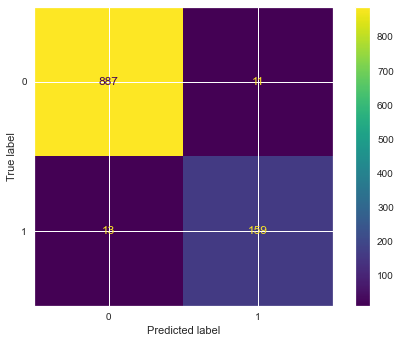

In [110]:
# Confusion Matrix
cm = confusion_matrix(y_test_rfe, y_pred_rfe)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [111]:
# Classification report model
cr = classification_report(y_test_rfe, y_pred_rfe)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       898
           1       0.94      0.92      0.93       172

    accuracy                           0.98      1070
   macro avg       0.96      0.96      0.96      1070
weighted avg       0.98      0.98      0.98      1070



In [112]:
# Precision Recall Curve
y_pred_rfe = xgb_rfe.predict_proba(X_test_rfe)[:,1]
prec, recall, _ = precision_recall_curve(y_test_rfe, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [113]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_rfe, y_pred_rfe, pos_label=xgb_rfe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.9940306624540323


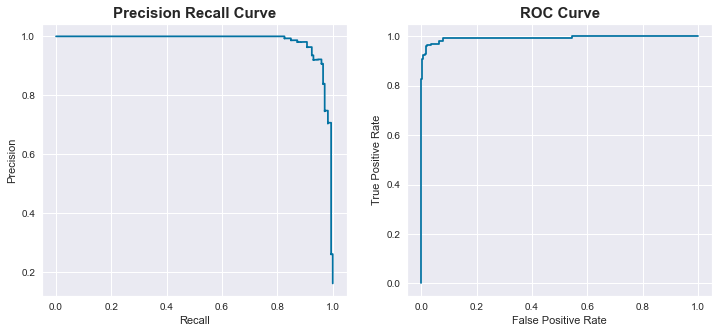

In [114]:
# roc auc score
auc_score = roc_auc_score(y_test_rfe, y_pred_rfe)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

##**Feature Importance**

In [115]:
feature_importance = pd.DataFrame({
    'Features':X_rfe.columns,
    'Importance':xgb_rfe.feature_importances_}).sort_values('Importance', ascending=False)

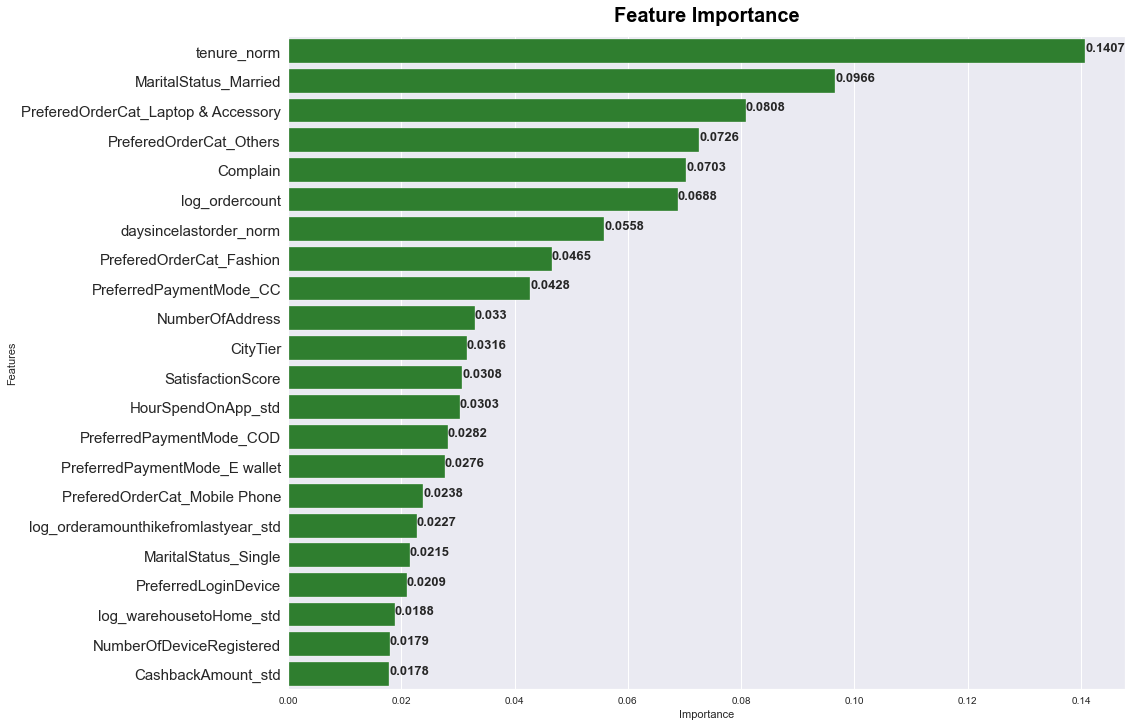

In [116]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='forestgreen')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

##**Thresholds Adjustment**

Selanjutnya kita akan lakukan pemilihan thresholds untuk memilih nilai thresholds terbaik dengan menggunakan DiscriminationThreshold.

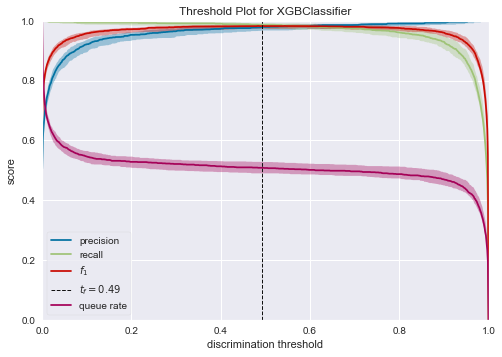

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [117]:
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(xgb_rfe)

# Fit the data to the visualizer
visualizer.fit(X_train_over_rfe, y_train_over_rfe)        
# Finalize and render the figure
visualizer.show()      

Dari hasil discrimination threshold diatas didapatkan thresholds paling ideal, yaitu 0.46. Hasil thresholds ini kita jadikan klasifikasi :

- Jika lebih dari nilai tersebut maka termasuk "Churn (1)"
- Jika sebaliknya berarti "Not Churn (0)".

In [118]:
# Create dataframe for appying thresholds
y_pred_final = pd.DataFrame({'Churn':y_test_rfe.values, 'Churn_Prob':y_pred_rfe})
y_pred_final['final_prediction'] = y_pred_final['Churn_Prob'].apply(lambda x: 1 if x > 0.49 else 0)
y_pred_final.head(10)

,Churn,Churn_Prob,final_prediction
0,0,0.006383,0
1,0,0.009444,0
2,0,0.006761,0
3,0,0.000405,0
4,0,0.001340,0
5,0,0.002818,0
6,0,0.002175,0
7,0,0.000569,0
8,0,0.000203,0
9,0,0.000462,0


### Confusion Matrix

[[884  14]
 [ 12 160]]


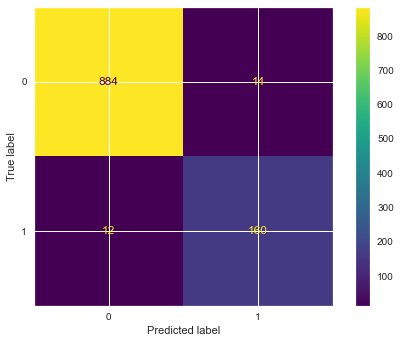

In [119]:
# Confusion Matrix
cm = confusion_matrix(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cm)
# Plotting confusion matrix
ConfusionMatrixDisplay(cm, display_labels=xgb_rfe.classes_).plot()
plt.show()

Dari hasil thresholds adjusment dapat dilihat bahwa hasilnya terdapat 884 berhasil diklasifikasi sebagai class 0 (Not Churn) dan sebanyak 160 diklasifikasi sebagai class 1 (Churn).

##**Classification Report**

In [120]:
# Classification Report
cr = classification_report(y_pred_final['Churn'], y_pred_final['final_prediction'])
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       898
           1       0.92      0.93      0.92       172

    accuracy                           0.98      1070
   macro avg       0.95      0.96      0.96      1070
weighted avg       0.98      0.98      0.98      1070



In [121]:
# Model performance after thresholds adjustment
acc_score_th = round(accuracy_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
prec_score_th = round(precision_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
recall_score_th = round(recall_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)
f1_th = round(f1_score(y_pred_final['Churn'], y_pred_final['final_prediction']) * 100, 2)

In [122]:
pd.DataFrame({
    'accuracy':[test_score_rfe, acc_score_th],
    'precision':[prec_score_rfe, prec_score_th],
    'recall':[recall_score_rfe, recall_score_th],
    'f1-score':[f1_rfe, f1_th]}, index=['default thresholds', 'thresholds adjusment'])

,accuracy,precision,recall,f1-score
default thresholds,97.76,93.53,92.44,92.98
thresholds adjusment,97.57,91.95,93.02,92.49


Ternyata setelah dilakukan thresholds adjustment, hasil yang didapatkan mengalami penurunan performa, maka kita tidak akan menggunakan nilai thresholds tersebut.

##**Business Insights and Recommendation**

Berdasarkan hasil dari Feature Importance, maka didapat bisnis insight dan rekomendasi berupa :

1. Tenure adalah feature terpenting dalam model. Jika dilihat pada Feature Extraction, customer yang sering churn termasuk ke dalam kategori Kelompok Tenure 1 atau customer yang memiliki masa tenure 0 sampai 12 Bulan sebanyak 22.68% . Oleh karena itu, perlu adanya treatment kepada customer Kelompok Tenure 1 yang mana masih belum banyak memiliki experiences dalam penggunaan aplikasi (bisa disebut sebagai pengguna baru). Agar customer tersebut dapat memiliki Tenure yang tinggi maka perusahaan disarankan menggunakan fitur gamifikasi sistem pengumpulan experiences pada saat selesai berbelanja. Semakin banyak experiences yang dikumpulkan sesuai poin yang menjadi ketentuan, maka customer dapat menukarkan experiences tersebut dengan sebuah barang, voucher gratis ongkir, potongan diskon terhadap barang-barang tertentu, dan lain-lain. Dengan diberlakukannya sistem gamifikasi tersebut diharapkan customer yang churn menjadi berkurang dan dapat meningkatkan revenue perusahaan.

2. Customer yang membeli laptop dan accessory memiliki potensi yang cukup tinggi untuk churn. Oleh karena itu, perlu mengoptimalkan penjualan di semua kategori untuk mengurangi potensi customer yg churn dengan memberikan promo.

3. Berdasarkan feature importance, customer yang cenderung churn adalah customer yang memiliki jumlah complain yang tinggi. Oleh karena itu, kami menyarankan kepada perusahaan untuk lebih memperhatikan service kepada customer yang diprediksi akan churn. Hal ini dapat dilakukan dengan cara memberikan pelayanan sebaik mungkin, yang mana harus meyakinkan customer bahwasannya setiap complain akan mendapatkan feedback yang baik berupa komitmen membantu menyelesaikan masalah mereka secara adil, efisien, dan tepat waktu. Selain itu, perlu diperhatikan kondisi dan kualitas barang yang dijual serta menindaklanjuti setiap keluhan customer dan memberikan reward untuk setiap masukan dari customer.

4. Customer yang sudah menikah lebih cenderung churn, hal ini kemungkinan disebabkan karena orang yang sudah menikah cenderung tidak memiliki waktu untuk mengecek kompetitor dan memiliki list belanjaan yang sudah pasti. Untuk itu perlu dibuat periode promo untuk kebutuhan rumah tangga.